In [110]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

In [111]:
# # gw50m
# answer_location = (52.53962045830213, 13.419884901364885, 50)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
# d = []
# # rssi to distance with curve fit
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

# gw100m
answer_location = (52.53962045830213, 13.419884901364885, 100)
source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
d = []
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)

# # gw100m_nobuilding
# answer_location = (52.53962045830213, 13.419884901364885, 200)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.58976692127023, -66.84978429622258, -65.43775615882458, -68.51723739248007, -69.34638664552159, -70.67158737502467, -69.47921756875596, -69.74188545126589, -71.33057463016215, -63.86118311152556])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

[511.8755465287958, 234.89856649485617, 197.5557485663918, 410.50477950801775, 305.73897592295174, 354.46186954189903, 295.9958660450461, 327.19722509936946, 394.29288508294167, 163.11736949587115]


Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
N

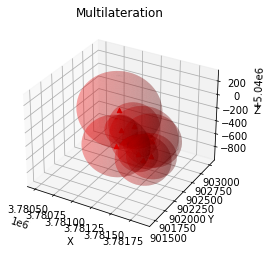

187.3539052709977


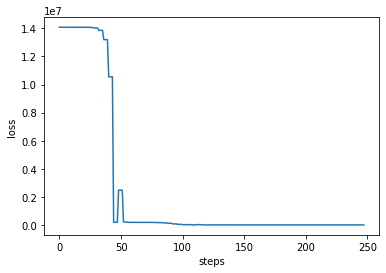

In [112]:
# multilateration program

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    print('Number of large errors:', np.sum(large_errors))
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

# Starting GPS coordinates of the receiver (can be anywhere)
receiver_location = (40.048174, 10.134445, 0)

# Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
xyz_receiver = np.array(to_cartesian(*receiver_location))

# Perform multilateration to estimate the location of the receiver
result = minimize(error, xyz_receiver, args=(xyz_sources, d))
xyz_receiver_estimated = result.x

# Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
receiver_location_estimated = to_gps(*xyz_receiver_estimated)

print('Receiver location:', receiver_location_estimated)
print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))

# Plot the sources and the estimated location of the receiver
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sources
for i in range(len(source_locations)):
    x, y, z = to_cartesian(*source_locations[i])
    ax.scatter(x, y, z, color='r', marker='^')

# Plot the estimated location of the receiver
x, y, z = to_cartesian(*receiver_location_estimated)
ax.scatter(x, y, z, color='b', marker='o')

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multilateration')

print(source_locations)
# Plot circles (or spheres) representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle (or sphere) in meters
    radius = d[i]
    # Get the Cartesian coordinates of the source
    x, y, z = to_cartesian(*source_locations[i])
    # Create a grid of points on the surface of the sphere
    # Sphere in 3D
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    X = x + radius*np.outer(np.cos(u), np.sin(v))
    Y = y + radius*np.outer(np.sin(u), np.sin(v))
    Z = z + radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.2)

plt.show()

# create a figure for error
fig = plt.figure()

plt.plot(loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
print(loss_array[-1])

# show the plot
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

# Plot the estimated location of the receiver
folium.Marker(location=receiver_location_estimated[:2], icon=folium.Icon(color='purple')).add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



In [113]:
# create every pattern of 4 or more beacons
import itertools

source_locations_iter = []
d_iter = []
for n in range(4,len(source_locations)+1):
	for source_location in itertools.combinations(source_locations, n):
	    source_locations_iter.append(list(source_location))
	    
for n in range(4,len(d)+1):
	for d_i in itertools.combinations(d, n):
	    d_iter.append(list(d_i))
print(source_locations_iter)
print(d_iter)

[[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.54022829654233, 13.424028618727982, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53768690920158, 13.423827698593255, 19)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53701243697258, 13.41926365424317, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53765506974833, 13.416535624425991, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715

[[11.4086094984278, 226.40156075812072, 4, 18.94317107387309, 6.2072023527136615, 44.055802694222024], [4.1842875493076335, 155.76534452253276, 4, 6.553174127426362, 151.00145182203374, 15.279816149033588], [4.4041050629428895, 153.95255717980078, 4, 6.743669365787397, 7.081320694213645, 15.99316064431129], [5.2972692740978005, 145.6587261824682, 4, 7.775091447270187, 5.72482339052611, 19.272535584708624], [1.332550488862644, 186.95949861240058, 4, 1.61338773824673, 4.678071983689905, 4.051960142235554], [6.505894549710128, 129.13686717420254, 4, 10.314705807430407, 44.115825693818756, 24.434646180995784], [4.46649625786835, 5.567621836512249, 4, 6.790924504842086, 14.611971566471395, 16.20808906588536], [25.842679402763316, 136.61440573281493, 4, 27.64133275409675, 5.485644157142802, 101.8785205911808], [35.72855252124724, 181.44433667636554, 4, 61.19338000089204, 123.39654512671063, 141.66596344215841], [29.529644727891466, 115.92562515381167, 4, 31.40377843972691, 17.362969209087186

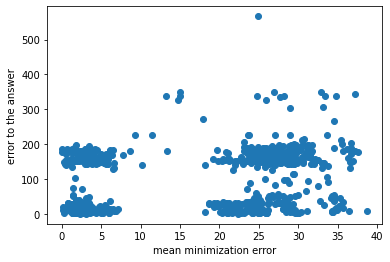

In [114]:
# multilateration with every patterns

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

xyz_receiver_estimated_list = []
receiver_locations_estimated = []
error_answer_minimization = []

for i in range(len(d_iter)):

    source_locations = source_locations_iter[i]
    d_comb = d_iter[i]

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, d_comb))
    xyz_receiver_estimated = result.x
    xyz_receiver_estimated_list.append(xyz_receiver_estimated)

    error_answer = np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated)
    error_answer_2d = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2])))
    error_answer_minimization.append([np.mean(errors_array[-1]), error_answer, len(d_comb), np.std(errors_array[-1]), error_answer_2d, loss_array[-1]])
    
    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)
    receiver_locations_estimated.append(receiver_location_estimated)

    # print('Receiver location:', xyz_receiver_estimated)
    # print('Receiver location:', receiver_location_estimated)
    # print('error', np.sum(errors_array[-1]))

print(error_answer_minimization)
error_answer_minimization.sort(key=lambda item: item[0])
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error")
plt.ylabel("error to the answer")
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

for i in range(len(receiver_locations_estimated)):
# Plot the estimated location of the receiver
    folium.Marker(location=receiver_locations_estimated[i][:2], icon=folium.Icon(color='purple'), tooltip=f'Point {i}').add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



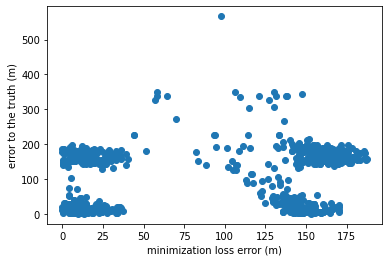

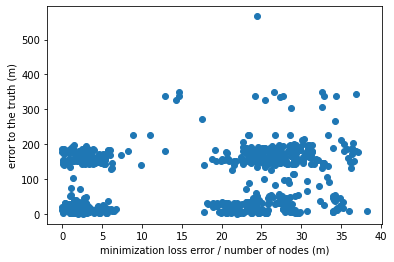

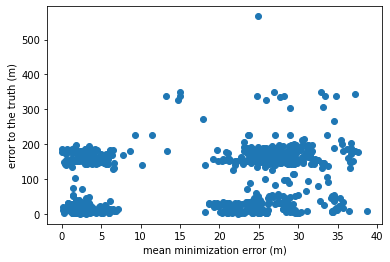

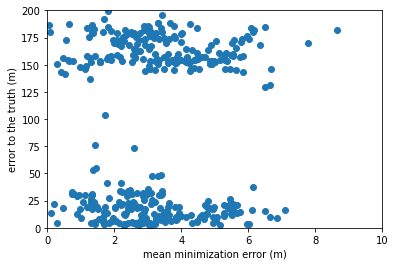

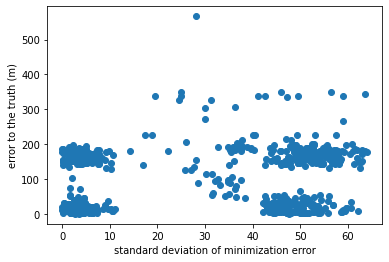

[]
[[186.28972502106788, 179.83174728523977, 13.9591880680253, 22.310623800062295, 4.416694899810039, 151.0427836039603, 142.97122936349496, 156.6373254824694, 17.892082847133395, 141.7742980004499, 172.7812286893669, 154.27205592841523, 187.614897151603, 33.22246358367684, 31.288442196916744, 153.2840387104665, 31.120738708032867, 12.4343708180126, 29.23021446759718, 30.36953228804803, 17.683846314476764, 8.922183008146073, 24.077233278514438, 145.99541974163895, 149.2325238074388, 19.075507129974806, 175.41153900105655, 136.80660235382194, 156.56678951192626, 19.18554279561414, 26.212269260398287, 30.198782612484774, 17.61193125739911, 30.711858792695843, 186.95949861240058, 53.11932420133335, 182.7430064978206, 23.55177154563752, 5.362697718331187, 158.23361070398158, 76.37605087415498, 54.70038835797583, 18.997111259468667, 8.540685318355132, 152.29288400574325, 180.14176201053647, 7.203977423553531, 5.764050163792233, 9.78945414488012, 191.9984715982234, 14.856755589165111, 3.8369

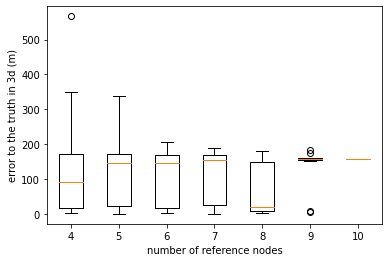

[]
[[11.451082155347912, 20.320533717580545, 7.737320420087002, 7.644379600465418, 3.398540788814644, 8.850872619263297, 150.78691411855638, 15.653670057656193, 17.064792231692245, 7.987127699098414, 21.14557778797983, 5.732969229025566, 17.254448368388115, 16.982372506277393, 20.11039810840069, 5.629506014346125, 12.124512270456613, 12.177216948098451, 9.93439272699726, 18.202867651953873, 9.509188444074244, 12.440155413463934, 11.241482405901815, 9.633770569059616, 5.797039204152792, 2.6327390743042414, 10.99859926559143, 10.192379723685905, 1.9021595378657508, 12.596000699088421, 17.861143677994782, 31.484210108732842, 6.214229822491816, 17.866441762149112, 4.678071983689905, 17.118558702435294, 17.046377552310286, 6.59248161742589, 5.760293781052566, 132.00853702838486, 13.595077022814987, 6.947177989871654, 5.750890182971102, 7.872374192219922, 10.66138839927452, 18.854393960077708, 6.114552288892616, 9.249986412334188, 1.378557698259775, 18.35258326589242, 7.885697622749992, 13.3

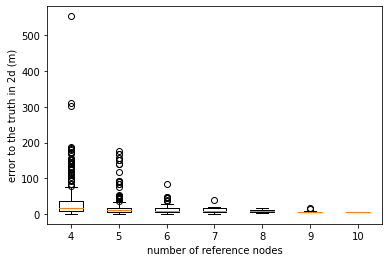

[]
[[11.451082155347912, 20.320533717580545, 7.737320420087002, 7.644379600465418, 3.398540788814644, 8.850872619263297, 150.78691411855638, 15.653670057656193, 17.064792231692245, 7.987127699098414, 21.14557778797983, 5.732969229025566, 17.254448368388115, 16.982372506277393, 20.11039810840069, 5.629506014346125, 12.124512270456613, 12.177216948098451, 9.93439272699726, 18.202867651953873, 9.509188444074244, 12.440155413463934, 11.241482405901815, 9.633770569059616, 5.797039204152792, 2.6327390743042414, 10.99859926559143, 10.192379723685905, 1.9021595378657508, 12.596000699088421, 17.861143677994782, 31.484210108732842, 6.214229822491816, 17.866441762149112, 4.678071983689905, 17.118558702435294, 17.046377552310286, 6.59248161742589, 5.760293781052566, 132.00853702838486, 13.595077022814987, 6.947177989871654, 5.750890182971102, 7.872374192219922, 10.66138839927452, 18.854393960077708, 6.114552288892616, 9.249986412334188, 1.378557698259775, 18.35258326589242, 7.885697622749992, 13.3

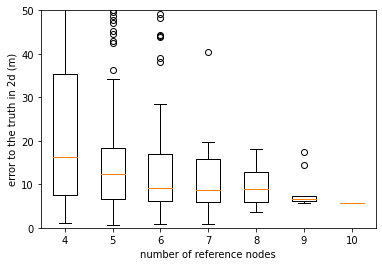

[]
[[0.05320194928862776, 0.06877828352750015, 0.1143957512777547, 0.20219315146127315, 0.27474349579158996, 0.30143497259931706, 0.3990338207900521, 0.4622565642059797, 0.4714774756724438, 0.5324840263195725, 0.557085844474436, 0.611189855766284, 0.6457053653463305, 0.7465291586471494, 0.7501607125189622, 0.7718883976576478, 0.7936243958146889, 0.873694336320213, 0.8828501000959008, 0.953895333388445, 0.9882828239606312, 1.0129699760175939, 1.0666163064284362, 1.1286267497762807, 1.1678187712801247, 1.1933622959479564, 1.2453100330144693, 1.2643134751569391, 1.2687902007722869, 1.2791468619001591, 1.3186446849972597, 1.3260823891567384, 1.3272571075686628, 1.32901618627983, 1.332550488862644, 1.3774789488375916, 1.3971766023653913, 1.3974818192369511, 1.4210528396348536, 1.4323869757390497, 1.435684485928725, 1.448596798515311, 1.4773357843469341, 1.5341430175008597, 1.566407546671897, 1.6519882010873133, 1.6637070644212315, 1.669384645491661, 1.6727033681489658, 1.6795860794441921, 1

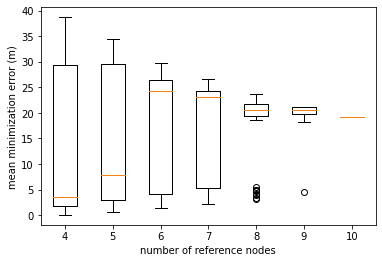

In [115]:
# visualization of multilateration with every pattern
# the relation between error to the truth and mean minimization error, number of reference nodes

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5]/item[2] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error / number of nodes (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")
plt.xlim(0, 10)
plt.ylim(0, 200)
#find line of best fit
a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("standard deviation of minimization error")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][1])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 3d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.ylim(0, 50)
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][0])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("mean minimization error (m)")
plt.show()

In [116]:
# [np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d]
for i in range(len(error_answer_minimization)):
    if error_answer_minimization[i][2] == 10:
        print(error_answer_minimization[i])
print(d_iter[-1])
print(d)

[19.164557721012706, 158.05403233254418, 10, 42.8151266037535, 5.723963017730114, 187.3539052709977]
[511.8755465287958, 234.89856649485617, 197.5557485663918, 410.50477950801775, 305.73897592295174, 354.46186954189903, 295.9958660450461, 327.19722509936946, 394.29288508294167, 163.11736949587115]
[511.8755465287958, 234.89856649485617, 197.5557485663918, 410.50477950801775, 305.73897592295174, 354.46186954189903, 295.9958660450461, 327.19722509936946, 394.29288508294167, 163.11736949587115]


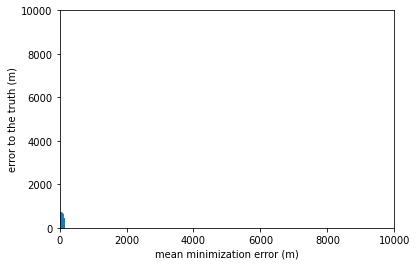

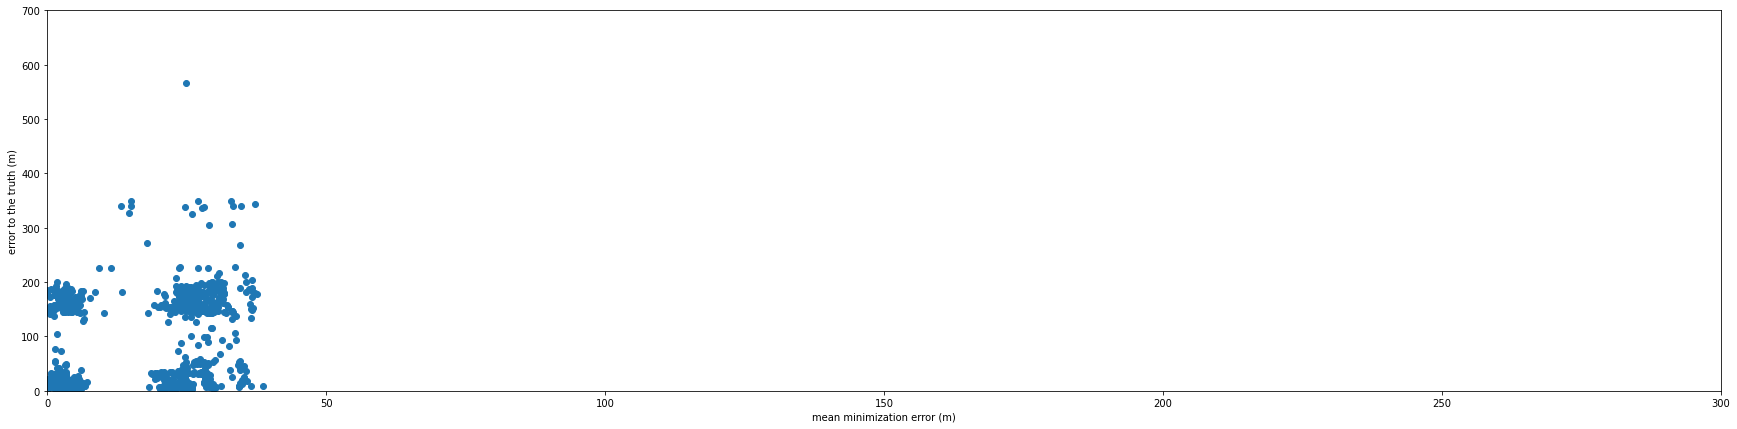

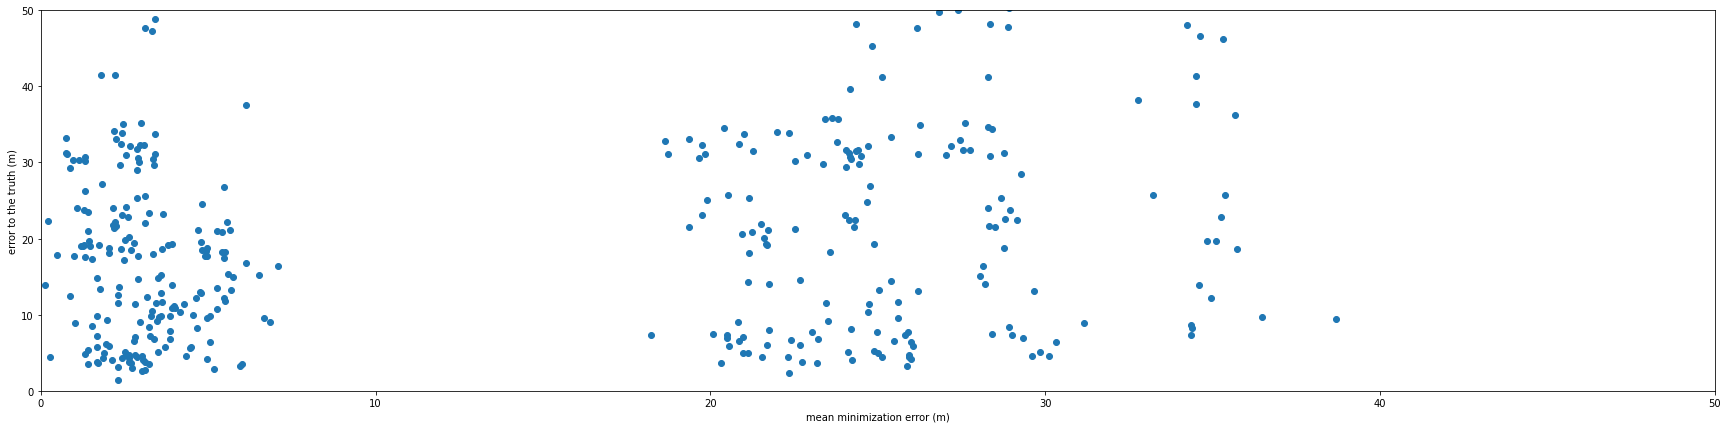

In [118]:
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()